STRATEGY:
- Buy when both conditions are met:
 - SMA1 > SMA2 > SMA3 > SMA4
 - When 1.27 fibonnaci level is broken
- Sell when:
 - (Sell ALL bought trades) Closing price is below SMA1

In [1]:
#!python3 -m pip install --upgrade pip

import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np

# Credentials

In [2]:
# keys_file = open("AllAccess_APICredentials.txt")
# lines = keys_file.readlines()
# api_key = lines[0].rstrip()
# api_secret = lines[1].rstrip()

# Opening Client

In [3]:
# import os
# import sys
# from bfxapi import Client, Order

# bfx = Client(
#   API_KEY=api_key,
#   API_SECRET=api_secret
# )

# Getting Historical Data

In [4]:
import time

input_time = "01 Jan 2011"
start_time = time.strptime(input_time, "%d %b %Y")
start_time = time.mktime(start_time)*1000

input_time = "01 Jan 2022"
end_time = time.strptime(input_time, "%d %b %Y")
end_time = time.mktime(end_time)*1000

In [5]:
# import json
# import time

# import requests

# timestamp = start_time
# last_timestamp = None
# time_diff = 0

# pair = 'tETCUSD'
# time_frame = '1D'

# url = ('https://api-pub.bitfinex.com/v2/'
#       f'candles/trade:{time_frame}:{pair}/hist')
# historical_data = []

# while (timestamp <= end_time):
#     try:
#         print("Requesting "+ time.ctime(timestamp/1000))
#         params = {'start': timestamp, 'limit': 365, 'sort': 1}
#         response = requests.get(url, params=params)
#         trades = json.loads(response.content)

#         time_diff = (trades[-1][0] - trades[-2][0])
#         timestamp = (trades[-1][0]) + time_diff
        
#         historical_data.extend(trades)
#         time.sleep(5)
#     except Exception as e:
#         print('LAST REQUEST FAILED')
#         print('LAST ENTRY: ', time.ctime(historical_data[-1][0]/1000))
#         break
    

In [6]:
# columns = ['MTS', 'OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME']
# df_candles = pd.DataFrame(historical_data, columns=columns)

In [7]:
# df_candles.to_csv(f'{pair}_{time_frame}_{time.ctime(historical_data[0][0]/1000)}'
#                   f'_to_{time.ctime(historical_data[-1][0]/1000)}.csv'
#                   .replace(' ', '_'),
#                  index=None
#                  )

# Opening Saved Historical Data for Analysis

In [8]:
limit = None

In [9]:
#df_candles = pd.read_csv(f'{pair}_{time_frame}_Tue_Jul_26_08:00:00_2016_to_Mon_May_17_08:00:00_2021.csv')[:]
df_candles = pd.read_csv(f'tBTCUSD_Sun_Mar_31_08:00:00_2013_to_Mon_May_17_08:00:00_2021.csv')[:limit]
df_candles

,MTS,OPEN,CLOSE,HIGH,LOW,VOLUME
0,1364688000000,92.500000,93.033000,93.74999,91.00000,3083.079791
1,1364774400000,93.250000,103.999000,105.90000,92.49999,5224.401313
2,1364860800000,104.000000,118.229354,118.38670,99.00000,8376.527478
3,1364947200000,117.958261,134.700000,146.88000,101.51088,12996.245072
4,1365033600000,134.716560,132.899000,143.00000,119.00000,6981.668305
...,...,...,...,...,...,...
2958,1620864000000,49580.546941,49750.649716,51333.00000,46601.04808,21164.537856
2959,1620950400000,49749.000000,49924.000000,51512.00000,48877.00000,6047.865623
2960,1621036800000,49923.307947,46844.000000,50737.00000,46644.00000,9488.630313
2961,1621123200000,46844.000000,46597.000000,49870.00000,44021.00000,19068.733077


# Generating Indicators

In [10]:
SMA1 = ta.trend.SMAIndicator(df_candles['CLOSE'], n=9).sma_indicator()
SMA2 = ta.trend.SMAIndicator(df_candles['CLOSE'], n=20).sma_indicator()
SMA3 = ta.trend.SMAIndicator(df_candles['CLOSE'], n=50).sma_indicator()
SMA4 = ta.trend.SMAIndicator(df_candles['CLOSE'], n=100).sma_indicator()
MACD_DIFF = ta.trend.MACD(df_candles['CLOSE']).macd_diff()

In [11]:
df_candles['SMA1'] = SMA1
df_candles['SMA2'] = SMA2
df_candles['SMA3'] = SMA3
df_candles['SMA4'] = SMA4
df_candles['MACD_DIFF'] = MACD_DIFF

In [12]:
# plt.figure(figsize=(15,5))
# ta.trend.MACD(df_candles['CLOSE']).macd()[:limit].plot()
# ta.trend.MACD(df_candles['CLOSE']).macd_signal()[:limit].plot()
# plt.show()

# plt.figure(figsize=(15,5))
# ta.trend.MACD(df_candles['CLOSE']).macd_diff()[:limit].plot()
# plt.show()

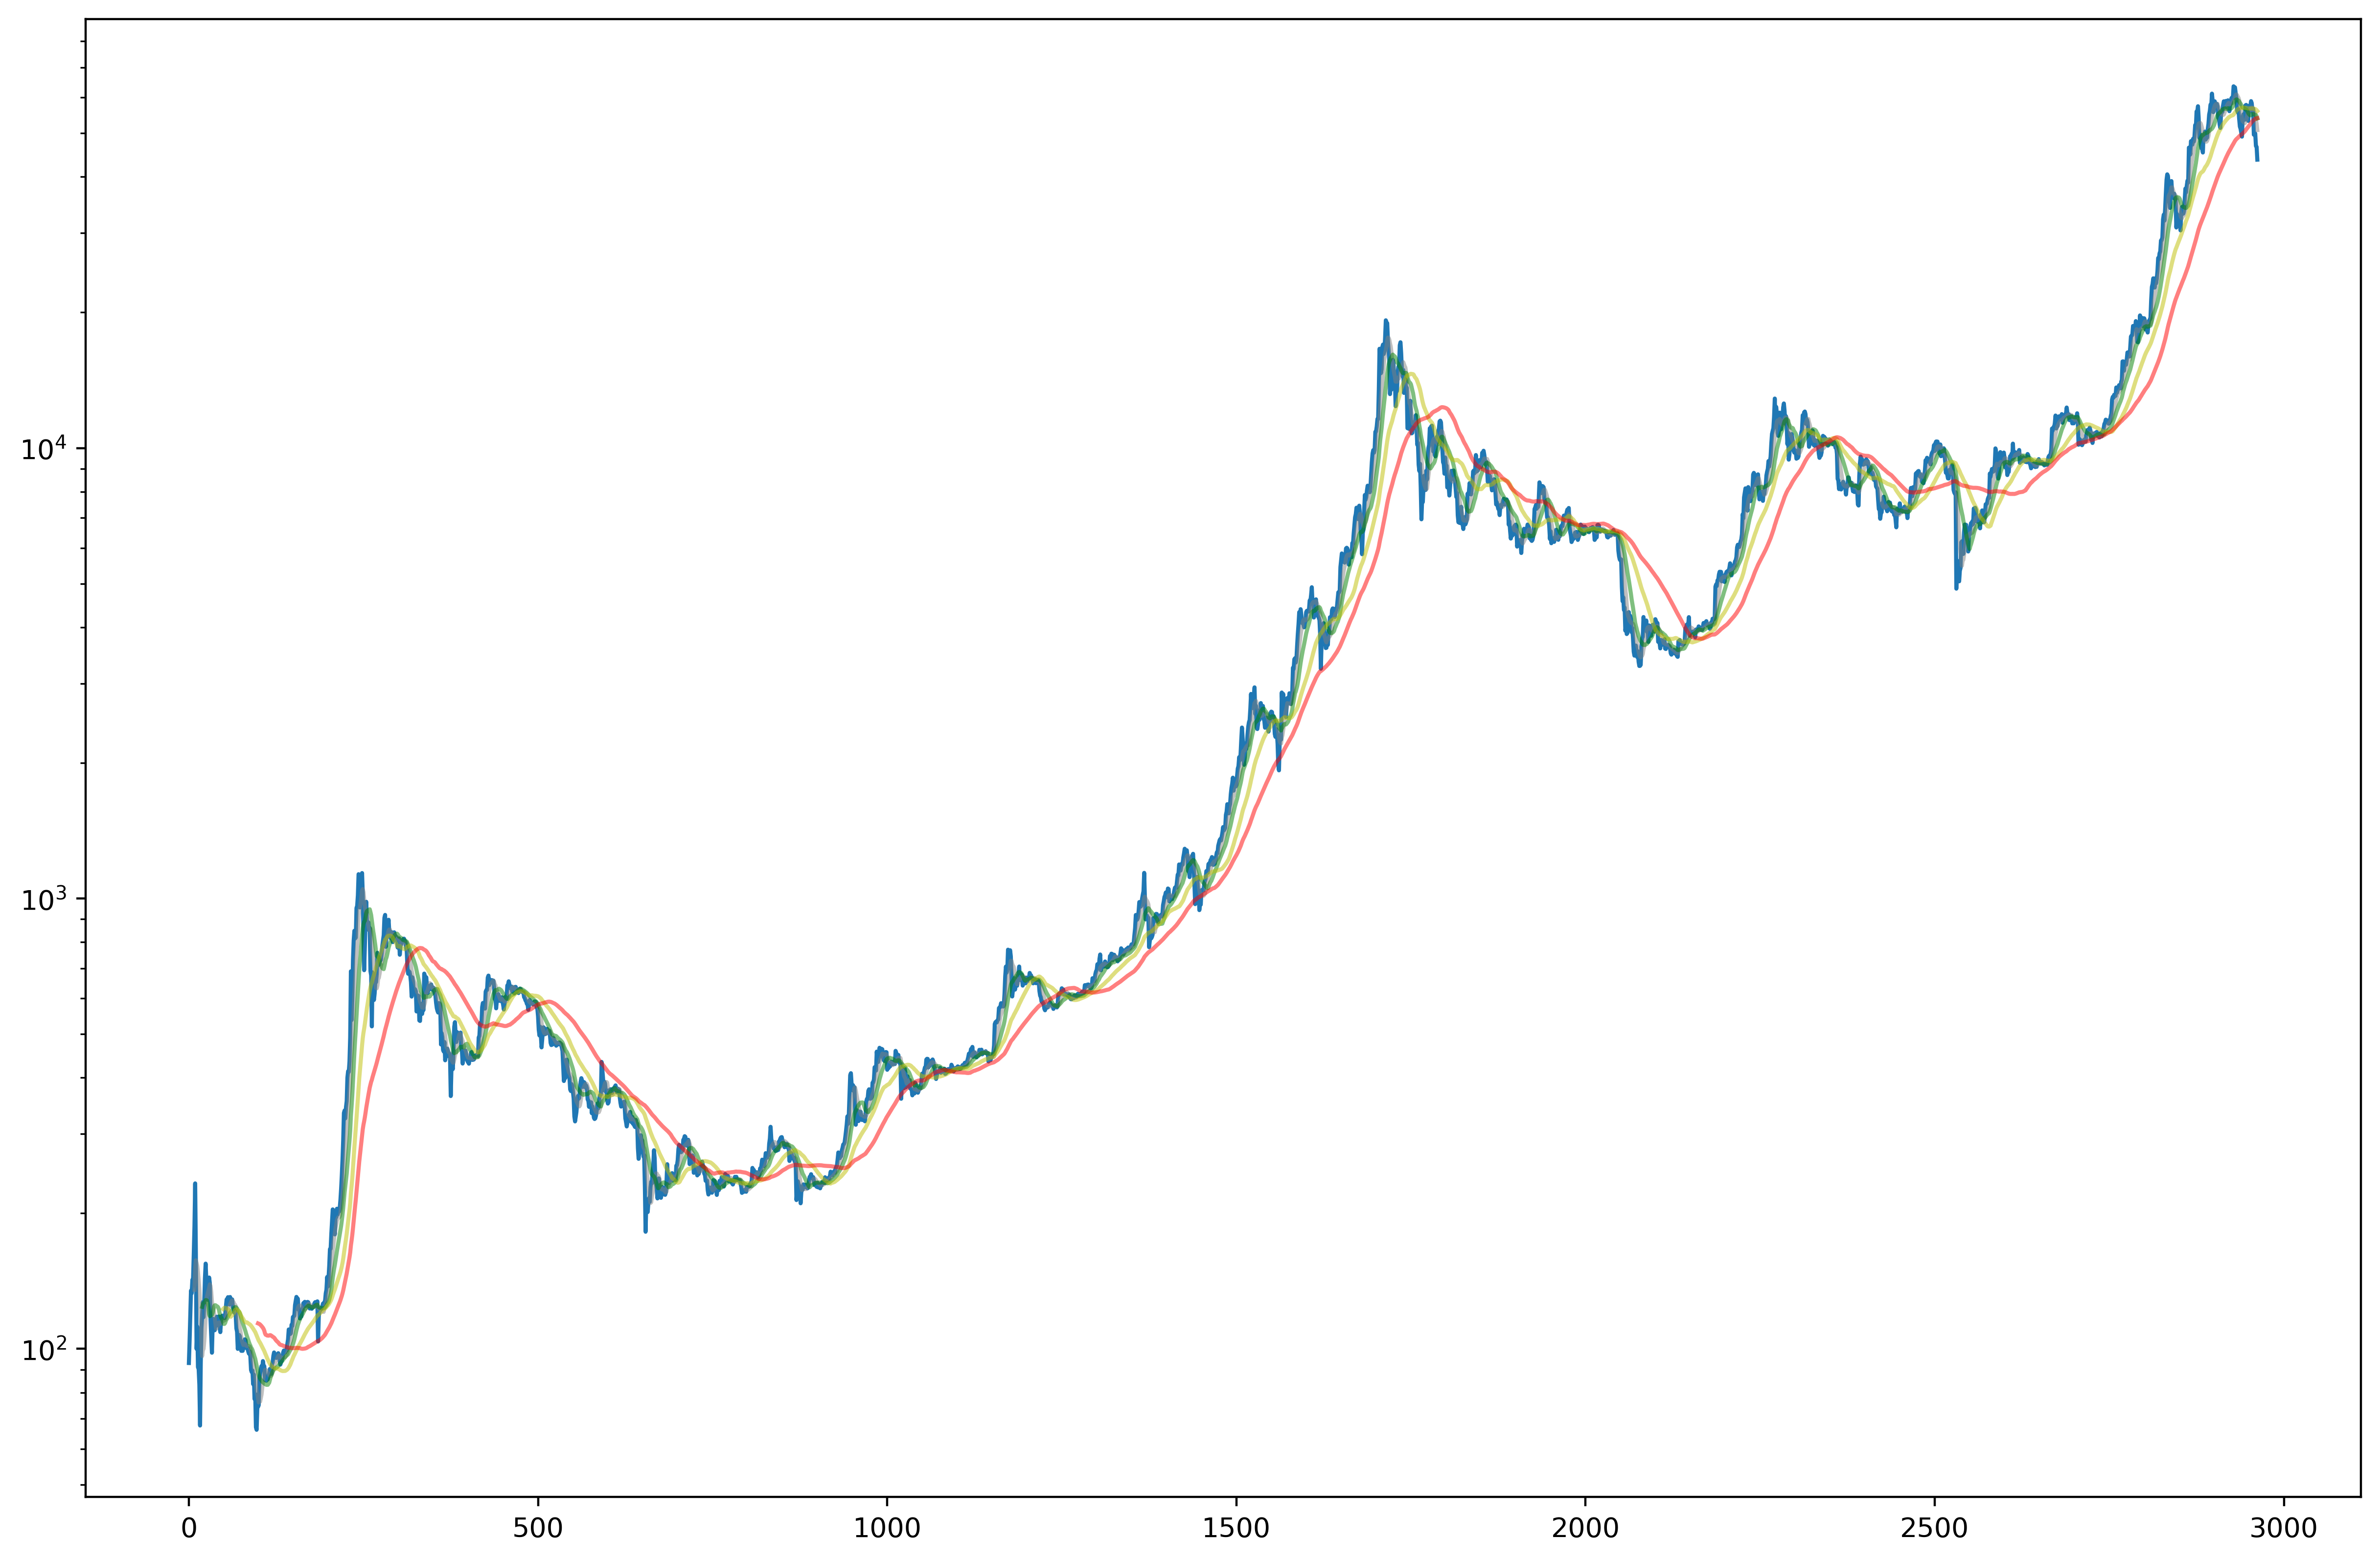

In [13]:
alpha=0.5
plt.figure(figsize=(15,10), dpi=400)
plt.plot(df_candles['CLOSE'])
plt.plot(SMA1, alpha=alpha, c='gray')
plt.plot(SMA2, alpha=alpha, c='g')
plt.plot(SMA3, alpha=alpha, c='y')
plt.plot(SMA4, alpha=alpha, c='r')
plt.yscale('log')
plt.show()

# Backtesting

In [14]:
# #Add pad for price_watch
# price_watch = [df_candles.iloc[0]['CLOSE']]

buy_prices = []
sell_prices = []
top_price_plot = []
bottom_price_plot = []
on_trade = False
pad = np.nan

#For MACD
top_prices = []
bottom_prices = []
#macd_diff = []

for i in range(df_candles.shape[0]):
    current_i = i
    previous_i = i-1
    
    #Get closing price today
    price = df_candles.iloc[current_i]['CLOSE']
    #Get moving average for AOTS check
    SMA1_price = df_candles.iloc[current_i]['SMA1']
    SMA2_price = df_candles.iloc[current_i]['SMA2']
    SMA3_price = df_candles.iloc[current_i]['SMA3']
    SMA4_price = df_candles.iloc[current_i]['SMA4']
    
    #Get current macd_diff_value and record
    macd_diff_value_current = df_candles.iloc[current_i]['MACD_DIFF']
    #print('macd_diff_value_current', macd_diff_value_current)
    if current_i >= 1:
        macd_diff_value_previous = df_candles.iloc[previous_i]['MACD_DIFF']
        #print('macd_diff_value_previous', macd_diff_value_previous)
        #    macd_diff.append(macd_diff_value_current)
    else:
        macd_diff_value_previous = np.nan
    
    #Take note of prices for top price and bottom price checking
    #If macd_diff_value_current is positive (upward)
    if np.sign(macd_diff_value_current) == 1:
        #If current_i is at least iteration 2 (for it to have a previous value)
        if current_i >= 1:
            #If current iteration is a reversal in macd
            if np.sign(macd_diff_value_current) != np.sign(macd_diff_value_previous):
                #Get top price
                try:
                    top_price = max(top_prices)
                #Or make it np.nan for now if there arent enough iterations yet
                except Exception as e:
                    print(e)
                    top_price = np.nan
                #Restart top_prices after assigning top_price
                top_prices = []
        #Collect top_prices
        top_prices.append(price)
    #If macd_diff_value_current is non-positive (downward) 
    else:
        #If current_i is at least iteration 2 (for it to have a previous value)
        if current_i >= 1:
            #If current iteration is a reversal in macd
            if np.sign(macd_diff_value_previous) != np.sign(macd_diff_value_current):
                #Get bottom price
                try:
                    bottom_price = min(bottom_prices)
                #Or make it np.nan for now if there arent enough iterations yet
                except Exception as e:
                    print(e)
                    bottom_price = np.nan
                #Restart bottom_prices after assigning bottom_price
                bottom_prices = []
        #Collect bottom_prices
        bottom_prices.append(price)
        
    #Compute confirmation price
    try:
        #if there is a switch in sign, from negative to positive
        if (np.sign(macd_diff_value_current) == 1) & (np.sign(macd_diff_value_previous) < 1):
            confirmation_price = top_price + (top_price - bottom_price)*0.27
            print('top_price', top_price)
            print('bottom_price', bottom_price)
            print('confirmation_price', confirmation_price)
            top_price_plot.append(top_price)
            bottom_price_plot.append(bottom_price)
            
    except Exception as e:
        print(e)
        #Pad buying and selling price if no buying or selling happened
        buy_prices.append(pad)
        sell_prices.append(pad)
        top_price_plot.append(top_price)
        bottom_price_plot.append(bottom_price)
        #Proceed with next iteration
        continue

    #SELLING
    #Check selling triggers if on trade:
    if on_trade:
        #If closing price is below fastest SMA (takes into account current)
        if price < SMA1_price:
            #Sell on closing price
            sell_prices.append(price)
            on_trade = False
            print(price, 'Sell')
            #Pad buying price
            buy_prices.append(pad)
            top_price_plot.append(top_price)
            bottom_price_plot.append(bottom_price)
            #Proceed with next iteration
            continue
    
    #BUYING
    #If Alignment of the Stars
    if SMA1_price > SMA2_price > SMA3_price > SMA4_price:
        #If price is beyond confirmatory price:
        if price > confirmation_price:
            #Append buying price for computation later
            buy_prices.append(price)
            #Trigger check for selling
            on_trade = True
            print(price, 'Buy')
            #Pad selling price
            sell_prices.append(pad)
            top_price_plot.append(top_price)
            bottom_price_plot.append(bottom_price)
            #Proceed with next iteration
            continue
    
                
    #Pad buying and selling price if no buying or selling happened
    buy_prices.append(pad)
    sell_prices.append(pad)
    try:
        top_price_plot.append(top_price)
        bottom_price_plot.append(bottom_price)
    except Exception as e:
        top_price_plot.append(pad)
        bottom_price_plot.append(pad)
        print(e)
    

name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'top_price' is not defined
name 'to

bottom_price 5510.0
confirmation_price 7968.847000000001
8052.7 Buy
8248.8 Buy
8096.9 Buy
8230.0 Buy
7977.1 Buy
8191.7 Buy
8753.4 Buy
9305.1 Buy
9723.6 Buy
9892.1 Buy
9766.1 Buy
9907.0 Buy
10860.0 Buy
10880.0 Buy
11162.0 Buy
11599.0 Buy
11592.0 Buy
13509.0 Buy
16609.0 Buy
15822.0 Buy
14661.0 Buy
14960.0 Buy
16753.0 Buy
16972.0 Buy
16171.0 Buy
16384.0 Buy
17569.0 Buy
19210.0 Buy
18960.0 Buy
18928.0 Buy
17345.0 Sell
16425.0 Buy
15645.0 Sell
13173.0 Buy
14035.0 Sell
13477.0 Buy
13633.0 Sell
top_price 19210.0
bottom_price 5810.7
confirmation_price 22827.811
top_price 17169.0
bottom_price 12384.0
confirmation_price 18460.95
top_price 11828.0
bottom_price 10779.0
confirmation_price 12111.23
top_price 11500.0
bottom_price 6946.6
confirmation_price 12729.418
top_price 8914.4
bottom_price 7845.0
confirmation_price 9203.137999999999
top_price 9861.2
bottom_price 6610.0
confirmation_price 10739.024000000001
top_price 7718.0
bottom_price 7097.9
confirmation_price 7885.427
top_price 6760.4
bottom_p

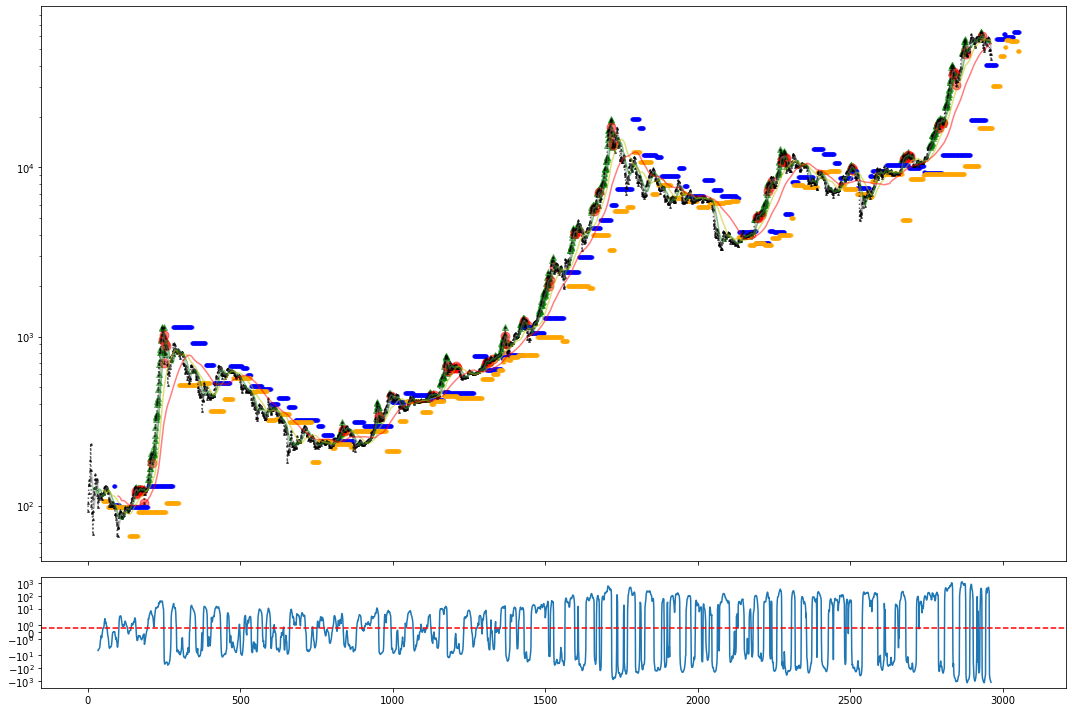

In [15]:
alpha=0.5

fig, (ax1, ax2, 
#      ax3
     ) = plt.subplots(2, 1,
                               figsize=(15,10),
                               sharex=True, 
                               gridspec_kw={'height_ratios': [5, 1,
#                                                              1
                                                             ]})
#plt.figure(figsize=(15,10), dpi=400)
#plt.scatter(range(len(sell_prices)), sell_prices,c='r', marker='o', alpha=alpha, s=80)
ax1.scatter(range(len(buy_prices)), buy_prices,c='g', marker='^', alpha=alpha)
ax1.plot(df_candles['CLOSE'], c='k', alpha=alpha*1.25, linestyle='dotted', marker='^', markersize=2)
ax1.plot(SMA1, alpha=alpha, c='gray')
ax1.plot(SMA2, alpha=alpha, c='g')
ax1.plot(SMA3, alpha=alpha, c='y')
ax1.plot(SMA4, alpha=alpha, c='r')
ax1.scatter(range(len(sell_prices)), sell_prices,c='r', marker='o', alpha=alpha, s=80)
ax1.scatter(range(len(top_price_plot)), top_price_plot,c='blue', marker='o', alpha=alpha, s=10)
ax1.scatter(range(len(bottom_price_plot)), bottom_price_plot,c='orange', marker='o', alpha=alpha, s=10)
ax1.set_yscale('log')

# plt.figure(figsize=(15,5))
# ax3.plot(ta.trend.MACD(df_candles['CLOSE']).macd()[:limit])
# ax3.plot(ta.trend.MACD(df_candles['CLOSE']).macd_signal()[:limit])
# ax3.set_yscale('symlog')
# ax3.axhline(y=0.5, color='r', linestyle='--')

#plt.figure(figsize=(15,5))
ax2.plot(ta.trend.MACD(df_candles['CLOSE']).macd_diff()[:limit])
ax2.set_yscale('symlog')
ax2.axhline(y=0.5, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Gain calculation

In [16]:
#Turn buy and sell prices into arrays
sell_prices_array = np.array(sell_prices)
buy_prices_array = np.array(buy_prices)

#Convert to DataFrame
df_gains = pd.DataFrame([sell_prices_array, buy_prices_array]).T
#Only select values with non-zeros as sum (i.e. not padded with zeroes)
df_gains = df_gains[df_gains.sum(axis=1) > 0]
#Rename columns
df_gains.columns = ['sell_price', 'buy_price']
#Replace padding with np.nan
df_gains = df_gains.replace(0, np.nan)
#Back fill sell prices
df_gains['sell_price'] = df_gains['sell_price'].fillna(method='bfill')
#Drop columns with no buy price
df_gains = df_gains.dropna(how='any', axis=0)

In [17]:
#Compute percentage gains
df_gains['percent_gain'] = 100*(df_gains['sell_price'] - df_gains['buy_price']) / df_gains['buy_price']

In [18]:
df_gains['percent_gain'].describe()

count    540.000000
mean      18.666717
std       57.601178
min      -18.542631
25%       -3.369385
50%        0.713834
75%       16.722892
max      387.220040
Name: percent_gain, dtype: float64

<AxesSubplot:ylabel='Frequency'>

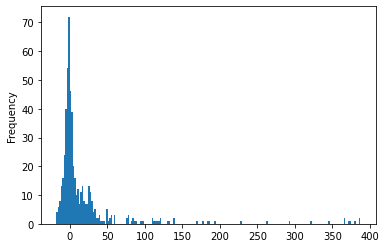

In [19]:
df_gains['percent_gain'].plot.hist(bins=200)

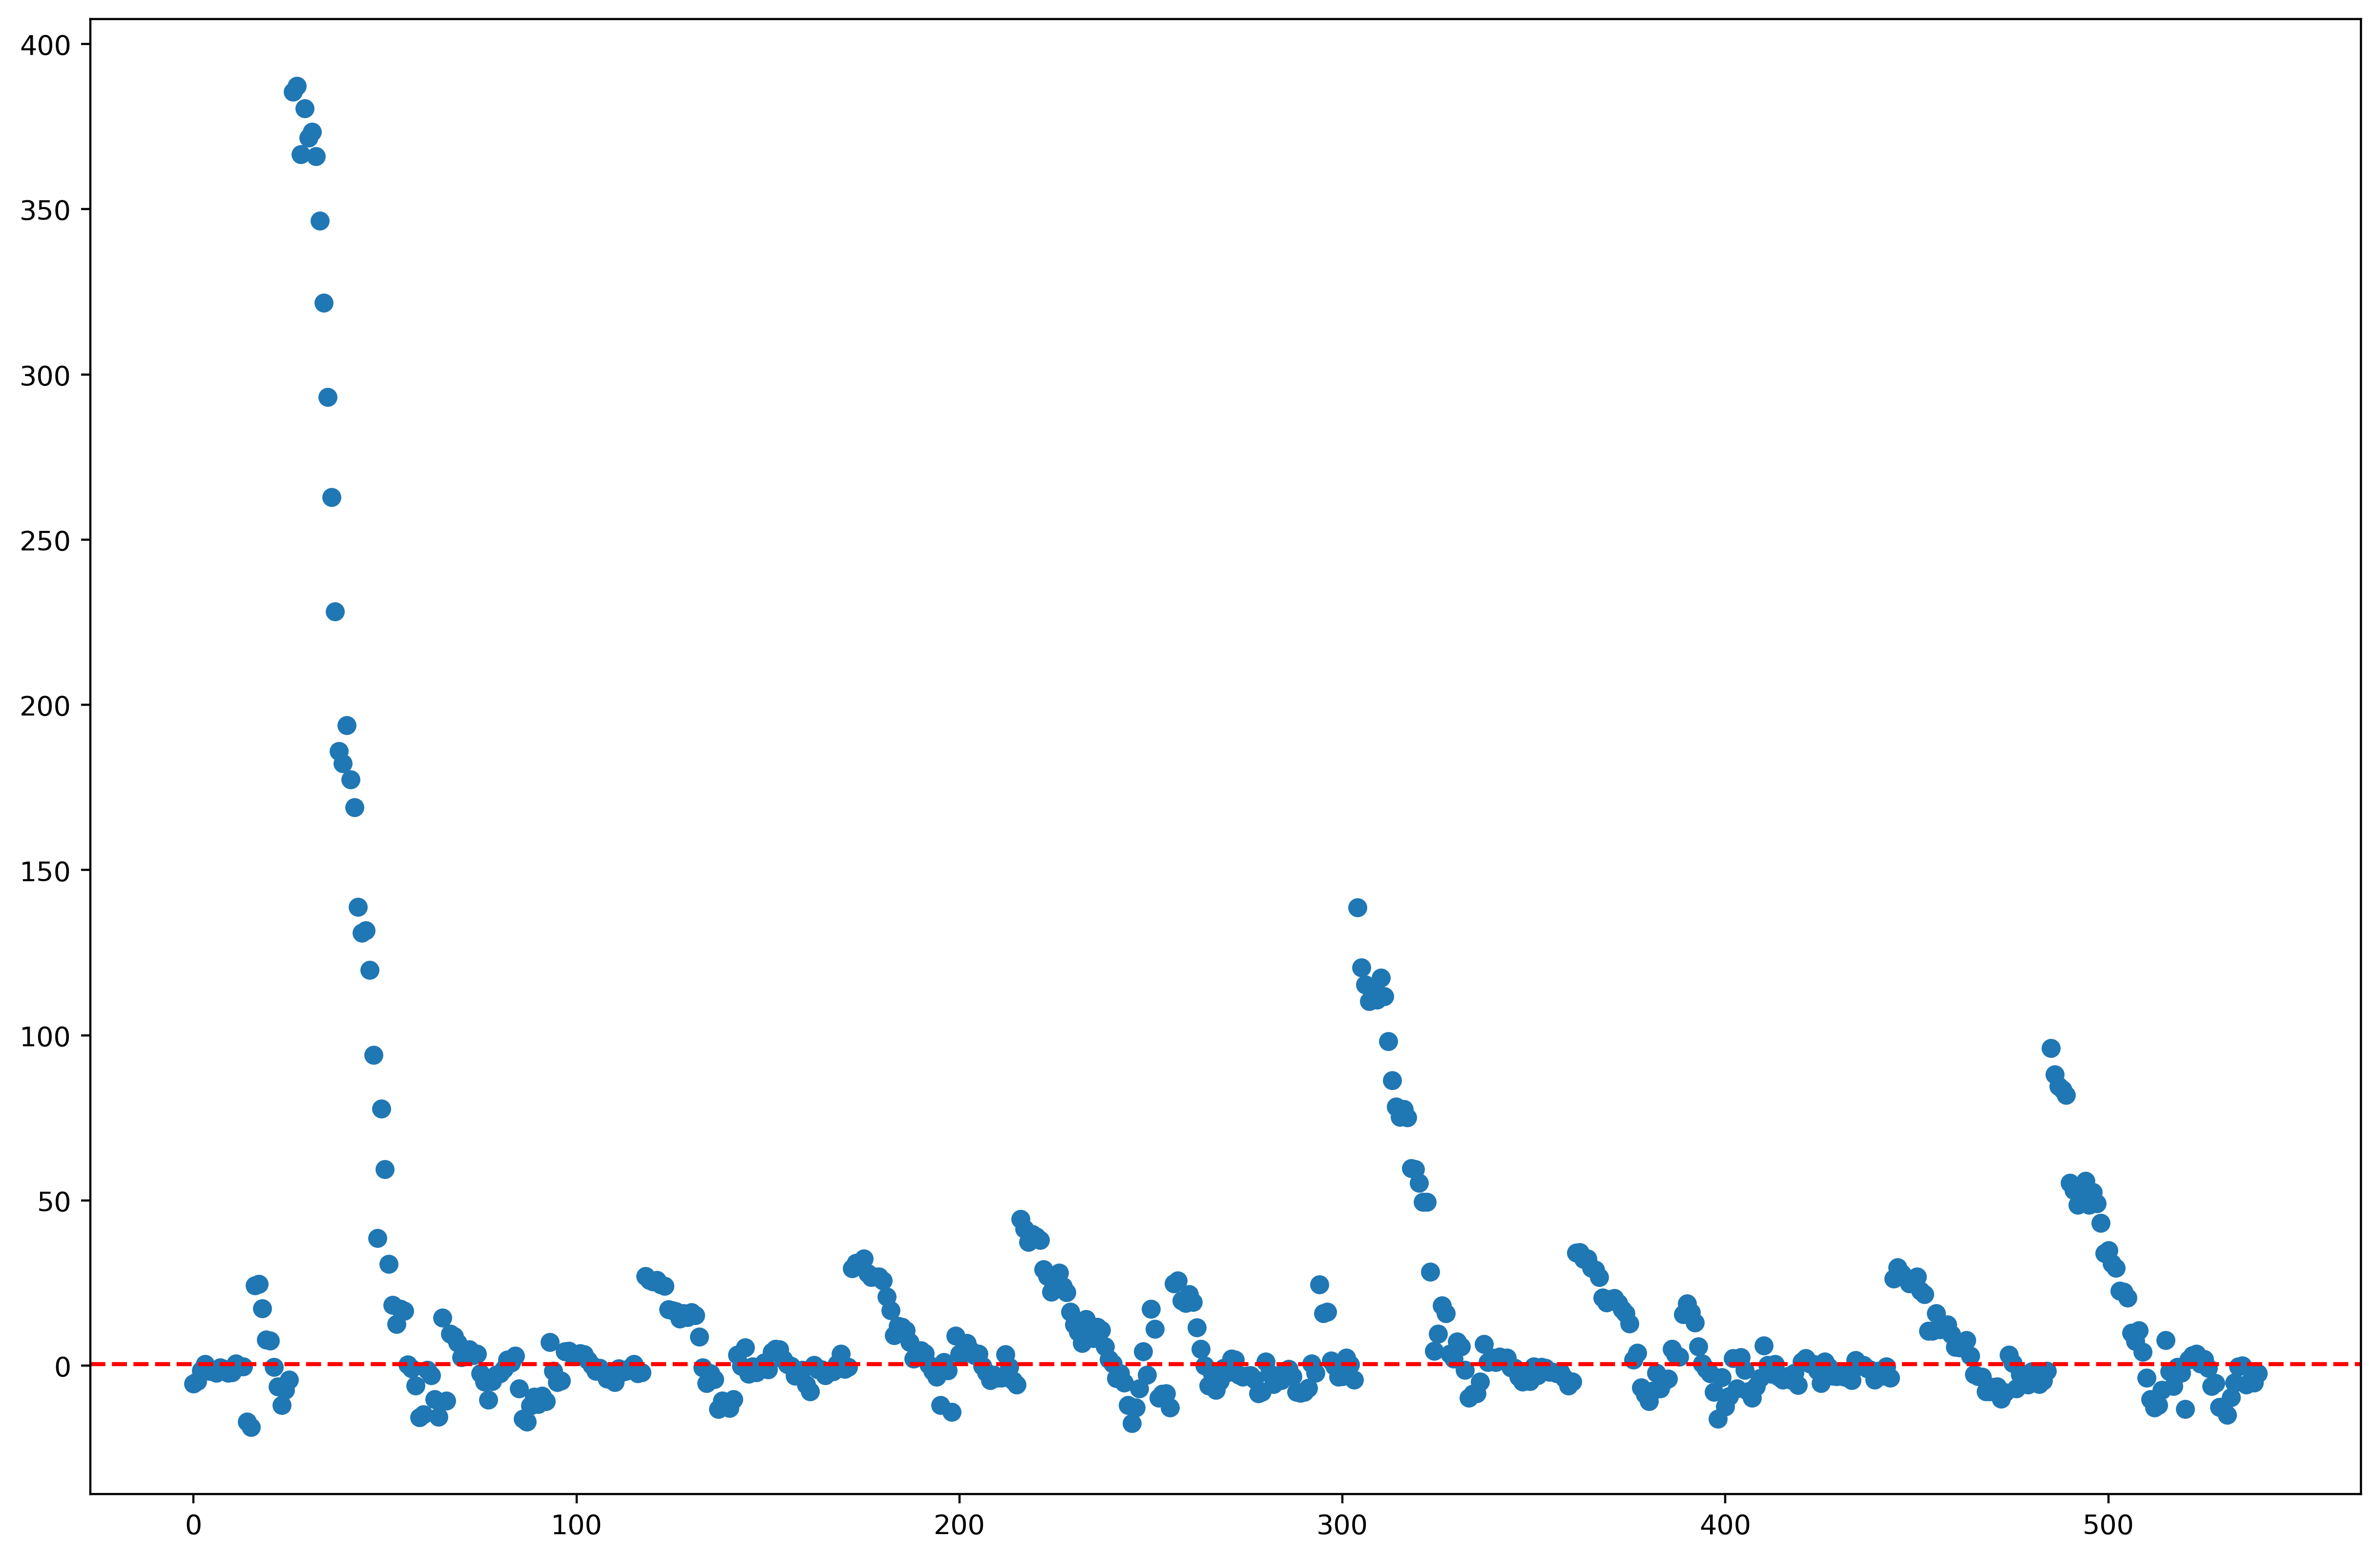

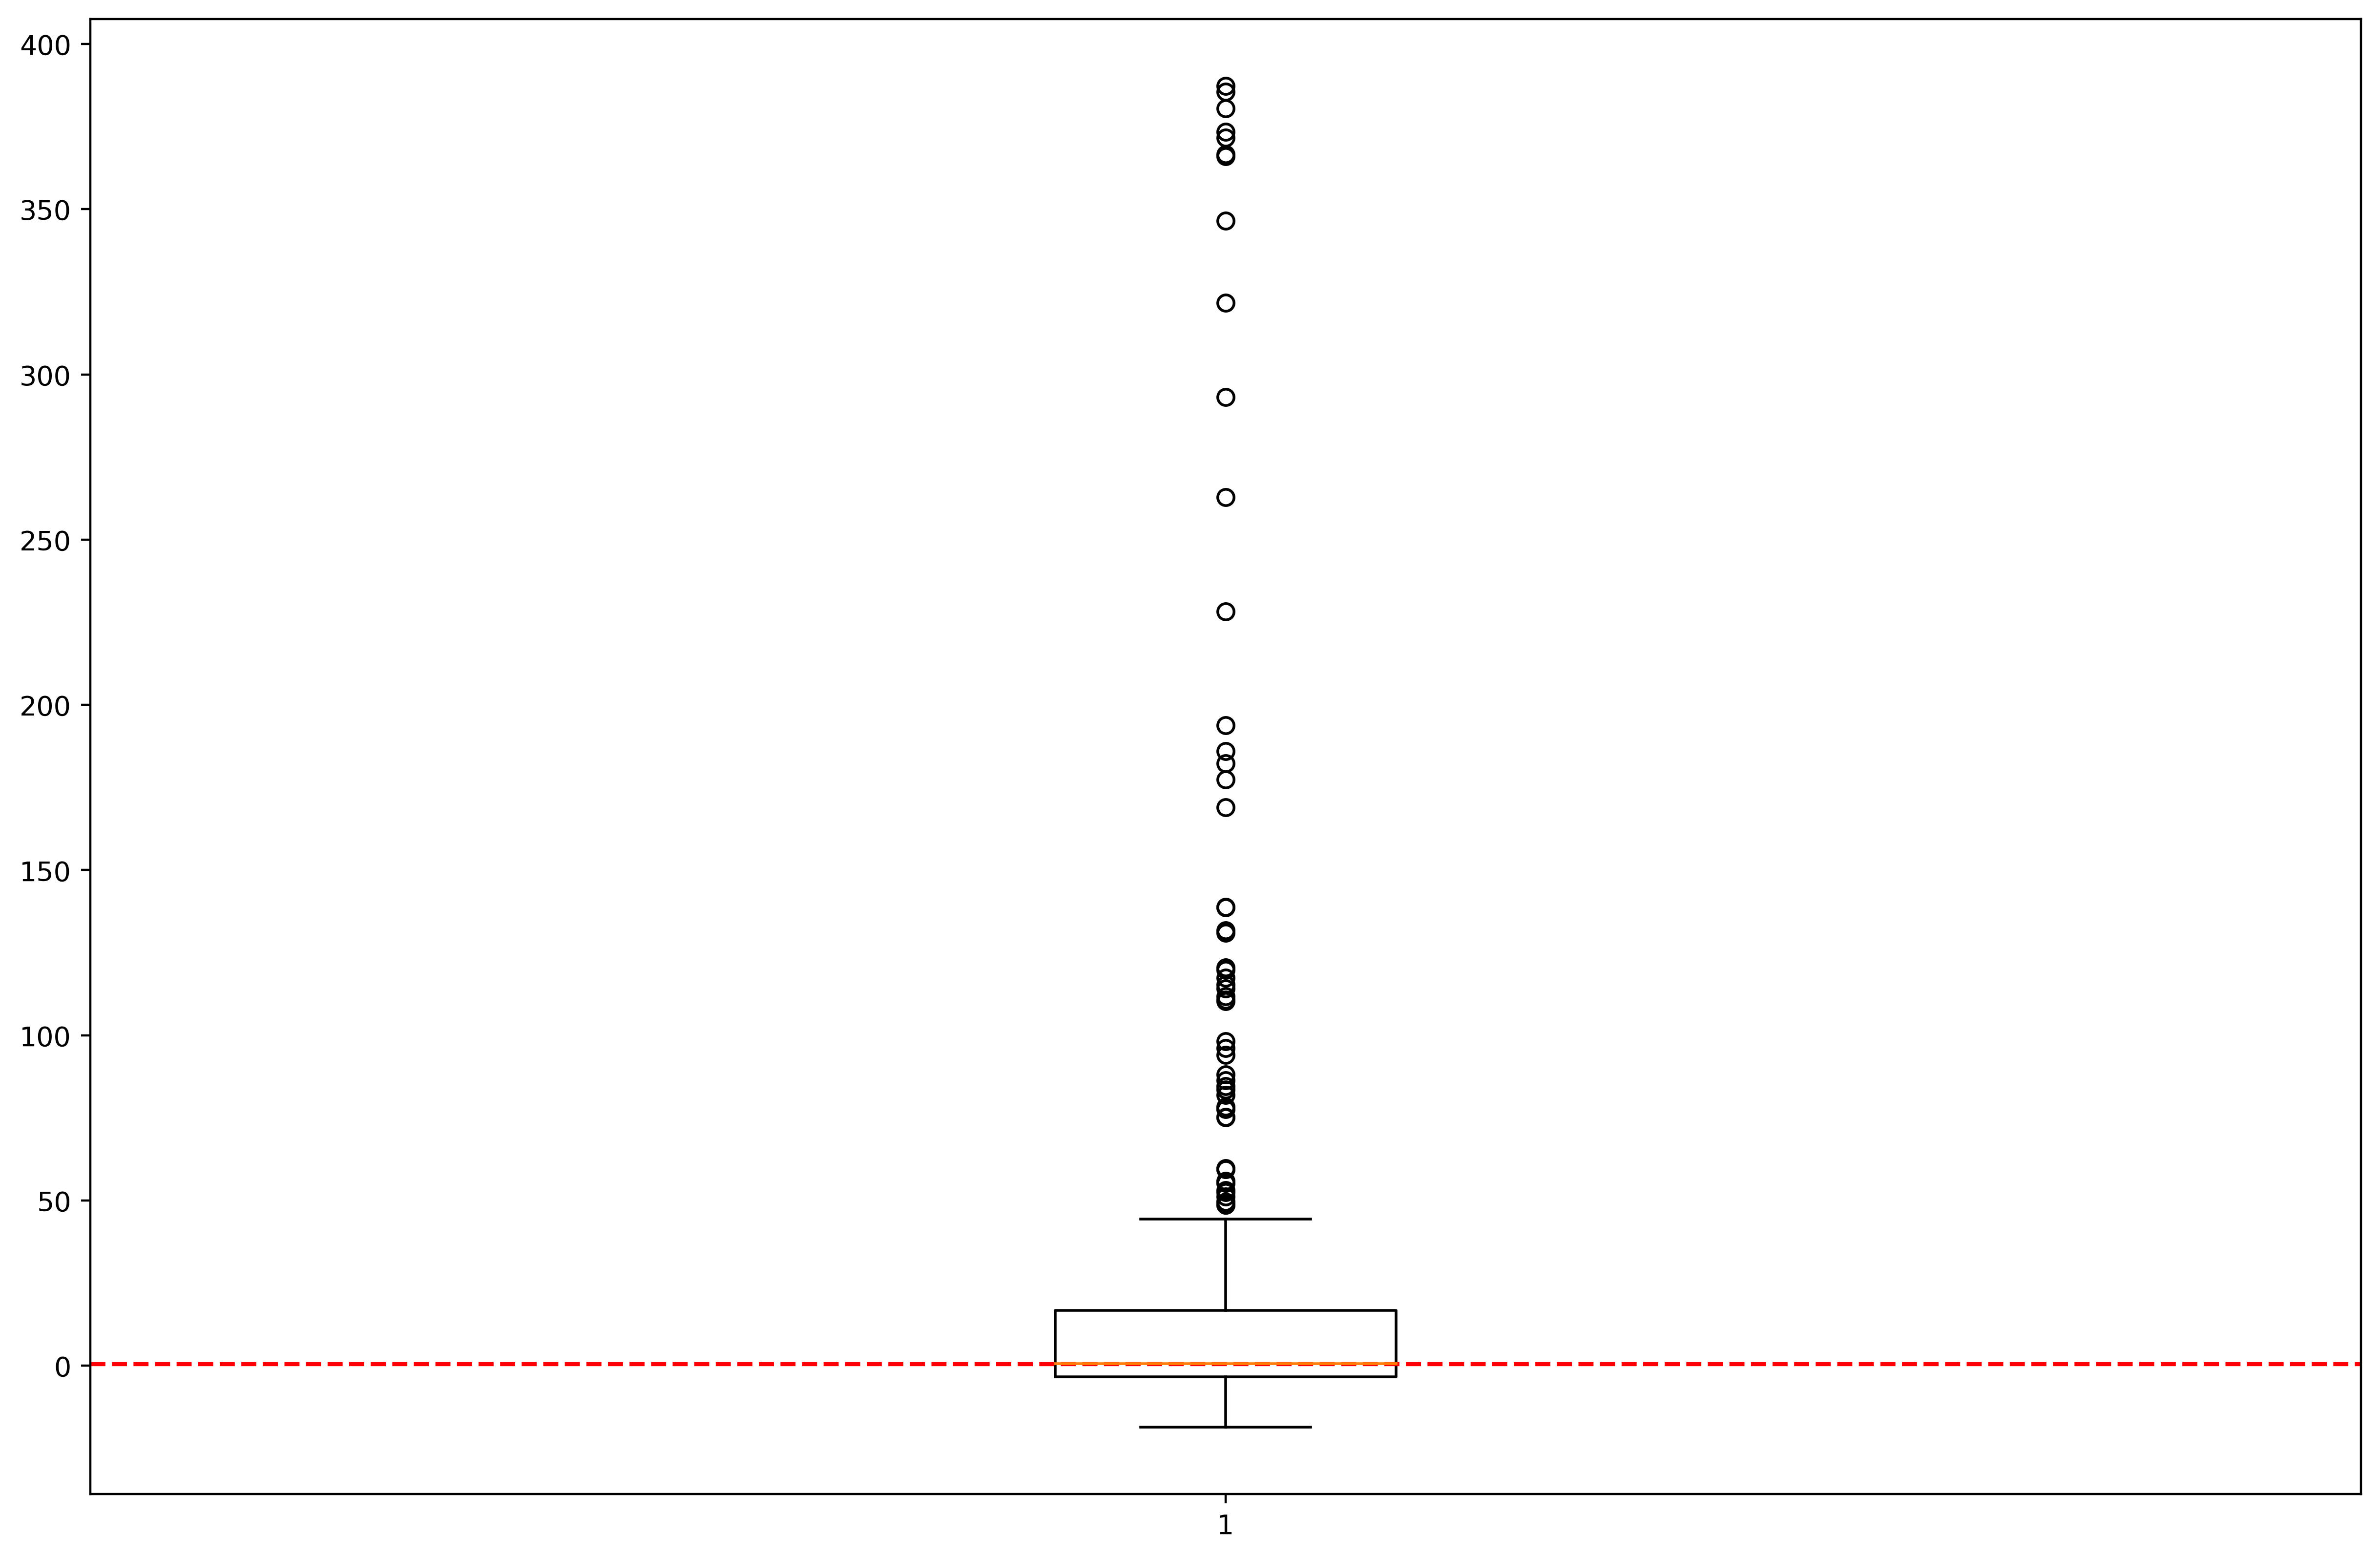

In [20]:
y = df_gains['percent_gain']
x = range(len(y))

plt.figure(figsize=(15,10), dpi=400)
plt.scatter(x, y)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(15,10), dpi=400)
plt.boxplot(y)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.show()

In [21]:
percent_wins = []
percent_losses = []
for i in df_gains['percent_gain']:
    if i > 0:
        percent_wins.append(i)
    else:
        percent_losses.append(i)
       
print('Win Count: ', len(percent_wins))
print('Average Win Percent', np.mean(percent_wins))
print('Lose Count: ', len(percent_losses))
print('Average Lose Percent', np.mean(percent_losses))
print('Win Rate: ', (len(percent_wins))/(len(percent_wins)+len(percent_losses)))
        

Win Count:  291
Average Win Percent 38.90511753022364
Lose Count:  249
Average Lose Percent -4.985389706917929
Win Rate:  0.5388888888888889
